# **Coloreado de Grafos**

### Importacion de las librerias

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

### Función para crear un grafo conexo

In [154]:
def crear_grafo(num_vertices):
    """ Create a connected graph with a given number of vertices. """
    G = nx.Graph()
    G.add_nodes_from(range(num_vertices))

    # Ensure the graph is connected
    for i in range(1, num_vertices):
        G.add_edge(i, i - 1)

    # Add some additional edges randomly to make the graph more complex
    additional_edges = num_vertices * 2
    for _ in range(additional_edges):
        v1, v2 = random.sample(range(num_vertices), 2)
        G.add_edge(v1, v2)

    return G

### Función para asignar los colores iniciales

In [155]:
def asignar_colores(G):
    colores = ['red', 'green', 'blue', 'yellow']
    for nodo in G.nodes:
        G.nodes[nodo]['color'] = random.choice(colores)

### Función para imprimir el grafo

In [156]:
def mostrar_grafo(G):
    colores = [G.nodes[n]['color'] for n in G.nodes]
    nx.draw(G, with_labels=True, node_color=colores,
            node_size=800, font_size=16)
    plt.show()

### Pedir al usuario que ingrese el número de vértices

In [157]:
# n_vertices = int(input("Ingrese el número de vértices: "))
n_vertices = 6

## **Algoritmo de Coloración de Welsh y Powell**

In [158]:
def welsh_powell(G):
    orden = sorted(G.nodes(), key=lambda x: len(G[x]), reverse=True)
    colores = {}
    for nodo in orden:
        vecinos = set(G[nodo])
        colores_disponibles = {'red', 'green', 'blue', 'yellow'} - \
            {colores[v] for v in vecinos if v in colores}
        colores[nodo] = colores_disponibles.pop(
        ) if colores_disponibles else 'black'
    for nodo in G.nodes:
        G.nodes[nodo]['color'] = colores[nodo]
    return orden

### Función para imprimir los grados de cada nodo

In [159]:
def grados(G):
    data = [("No. de vértice", "Grado del vértice")]
    data.extend([(nodo, G.degree(nodo)) for nodo in sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=True)])
    print(tabulate(data, headers="firstrow", tablefmt="grid"))

Mostramos el grafo original

Grafo Original:


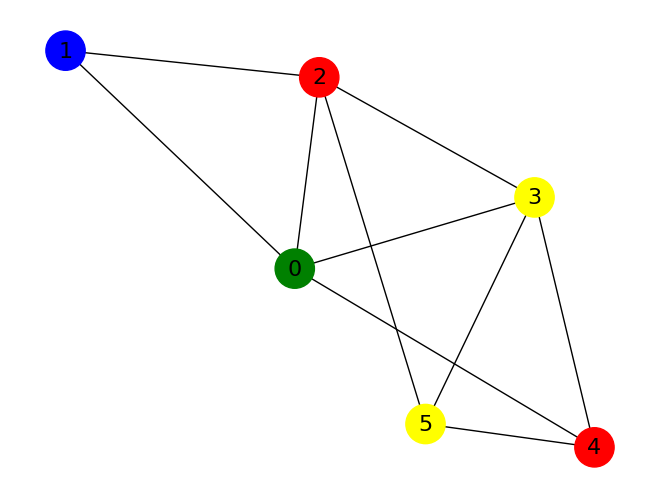

In [160]:
G = crear_grafo(n_vertices)
asignar_colores(G)
print("Grafo Original:")
mostrar_grafo(G)

Mostramos el grafo espués de aplicar Welsh y Powell

Grafo después de aplicar Welsh y Powell:


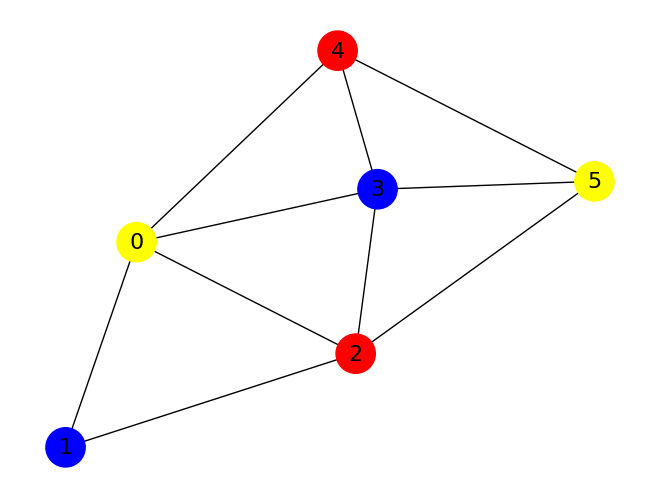

In [161]:
welsh_powell(G)
print("Grafo después de aplicar Welsh y Powell:")
mostrar_grafo(G)

Tabla 1: Grados de los vértices de la Coloración Welsh y Powell

In [162]:
grados(G)

+------------------+---------------------+
|   No. de vértice |   Grado del vértice |
+==================+=====================+
|                0 |                   4 |
+------------------+---------------------+
|                2 |                   4 |
+------------------+---------------------+
|                3 |                   4 |
+------------------+---------------------+
|                4 |                   3 |
+------------------+---------------------+
|                5 |                   3 |
+------------------+---------------------+
|                1 |                   2 |
+------------------+---------------------+


## **Algoritmo de Coloración de Matula, Marble, Isaacson**